# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


**DATASETS SOURCE:**

https://www.kaggle.com/datasets/ananthr1/weather-prediction

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [21]:
# Load dataset
df = pd.read_csv("seattle-weather.csv")

# Tampilkan 5 data awal
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [22]:
# Informasi struktur dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [23]:
# Dimensi dataset
df.shape


(1461, 6)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Missing Value Check

In [24]:
df.isnull().sum()


,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


Duplikasi Data

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
# Hapus duplikasi
df = df.drop_duplicates()

Statistik Deskriptif

In [27]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Distribusi Target

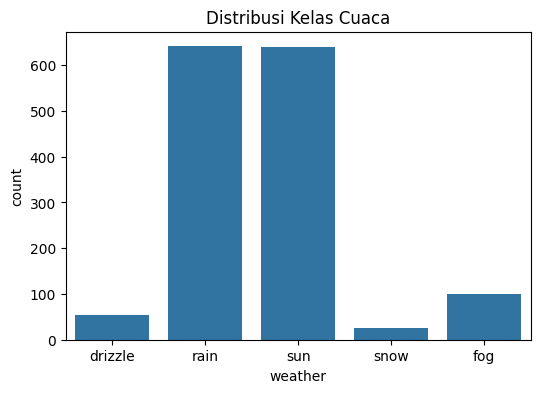

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="weather")
plt.title("Distribusi Kelas Cuaca")
plt.show()

Korelasi Fitur Numerik

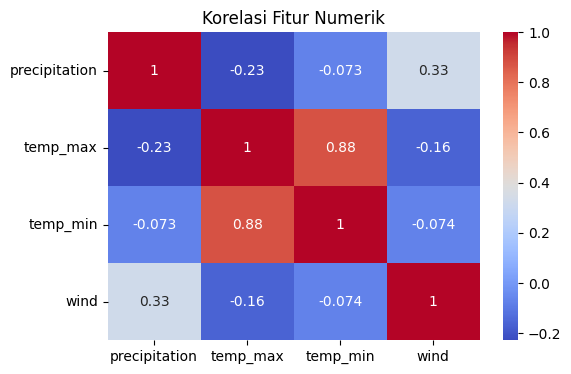

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['precipitation','temp_max','temp_min','wind']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Pemilihan Fitur dan Target

In [30]:
X = df.drop(columns=["weather", "date"])
y = df["weather"]

Encoding Label

In [31]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Mapping label
label_mapping = dict(zip(label_encoder.classes_,
                          label_encoder.transform(label_encoder.classes_)))
label_mapping

{'drizzle': np.int64(0),
 'fog': np.int64(1),
 'rain': np.int64(2),
 'snow': np.int64(3),
 'sun': np.int64(4)}

Normalisasi Fitur Numerik

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,precipitation,temp_max,temp_min,wind
0,-0.453650,-0.495299,-0.644212,1.014980
1,1.178598,-0.794731,-1.082347,0.875833
2,-0.333852,-0.645015,-0.206077,-0.654780
3,2.586224,-0.576962,-0.524720,1.014980
4,-0.258978,-1.026111,-1.082347,1.989006


Deteksi Outlier

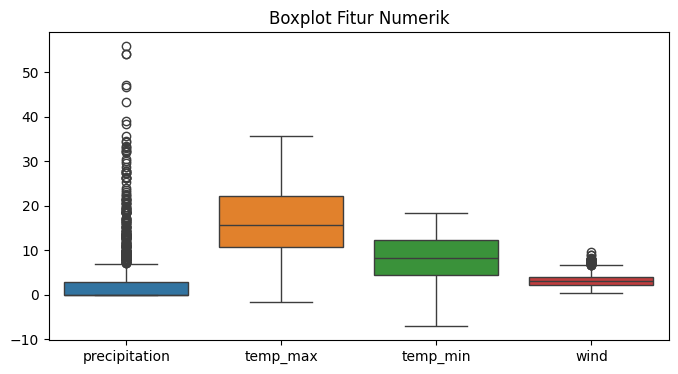

In [33]:
plt.figure(figsize=(8,4))
sns.boxplot(data=X)
plt.title("Boxplot Fitur Numerik")
plt.show()

Dataset Final

In [34]:
df_processed = X_scaled.copy()
df_processed["weather"] = y_encoded

df_processed.head()

,precipitation,temp_max,temp_min,wind,weather
0,-0.453650,-0.495299,-0.644212,1.014980,0
1,1.178598,-0.794731,-1.082347,0.875833,2
2,-0.333852,-0.645015,-0.206077,-0.654780,2
3,2.586224,-0.576962,-0.524720,1.014980,2
4,-0.258978,-1.026111,-1.082347,1.989006,2


In [35]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.2 KB


Simpan Datasets Hasil Preprocessing

In [36]:
import os

os.makedirs("weather_preprocessing", exist_ok=True)

df_processed.to_csv(
    "weather_preprocessing/seattle_weather_processed.csv",
    index=False
)